In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from iuvs import io, plotting
fname = io.l1b_filenames("cruisecal2-mode080-muv", stage=False)
l1b = io.L1BReader(fname[0])
imgop = plotting.L1BImageOperator(l1b)

In [4]:
import plotly.plotly as py

In [168]:
plotly.graph_objs.Histogram?

In [194]:
import plotly.plotly as py

objs = []
images = ['rawfirst', 'rawlast', 'dark1', 'dark2', 
          'rawfirst-dark1','rawfirst-dark2','rawlast-dark1','rawlast-dark2']
for title, img in zip(images, imgop.get_images_from_statements(images)):
    zmin = None
    zmax = None
    if '-' in title:
        zmin = 200
        zmax = 800
    figtitle = "{} | INT_TIME={}".format(title, l1b.img_header['INT_TIME'])
    fig = plotting.make_plotly_multiplot(img, title=figtitle, zmin=zmin, zmax=zmax)
    py.image.save_as(fig, title+'.png', width=1280, height=1024)
    objs.append(py.iplot(fig,
                         width=900,
                         height=700,
                         filename=figtitle,
                         fileopt='overwrite',
                         auto_open=False)
                )

In [195]:
from IPython.display import display

for i,obj in enumerate(objs):
    display(obj)

# Now forcing corners to 0

## Upper left

### Subtracting just mean of upper lift of raws

In [196]:
from iuvs import scaling

In [197]:
import numpy as np

In [198]:
funcs = [scaling.get_ul, scaling.get_ll, scaling.get_ur, scaling.get_lr]
fixed = []
for func in funcs:
    fixed.append(imgop.rawfirst - np.median(func(imgop.rawfirst)))

In [192]:
objs = []
titles = ['UL','LL','UR','LR']
for title, img in zip(titles, fixed):
    figtitle = 
    fig = plotting.make_plotly_multiplot(img, title=title, zmin=200, zmax=800)
    py.image.save_as(fig, title+'.png', width=1280, height=1024)
    objs.append(py.iplot(fig,
                         width=900,
                         height=700,
                         filename=title,
                         fileopt='overwrite',
                         auto_open=False)
                )

In [193]:
for obj in objs:
    display(obj)

In [10]:
raw0 = l1b.detector_raw[0]
dark1 = l1b.detector_dark[1]

def corner_fitting(Scaler):
    corner_light = raw0[:, :50]
    corner_dark = dark1[:, :50]
    scaler = Scaler(corner_dark, corner_light)
    scaler.do_fit()
    return scaler.apply_fit(dark1)

In [11]:
scalers = [scaling.AddScaler, scaling.MultScaler, scaling.PolyScaler]
scaled = []
for scaler in scalers:
    scaled.append(raw0 - corner_fitting(scaler))

In [12]:
objs = []
for title, img in zip(['raw0', 'AddScaler','MultiScaler','PolyScaler'],
                      [raw0]+scaled):
    fig = plotting.make_plotly_multiplot(img, title=title, zmin=200, zmax=800)
    py.image.save_as(fig, title+'.png', width=1280, height=1024)
    objs.append(py.iplot(fig,
                         width=900,
                         height=700,
                         filename=title,
                         fileopt='overwrite',
                         auto_open=False)
                )

KeyboardInterrupt: 

In [245]:
for o in objs:
    display(o)

In [15]:
from matplotlib.pyplot import subplots,colorbar
import numpy as np

In [22]:
import os

In [30]:
dataid = '_'.join(os.path.basename(l1b.fname).split('_')[3:5])

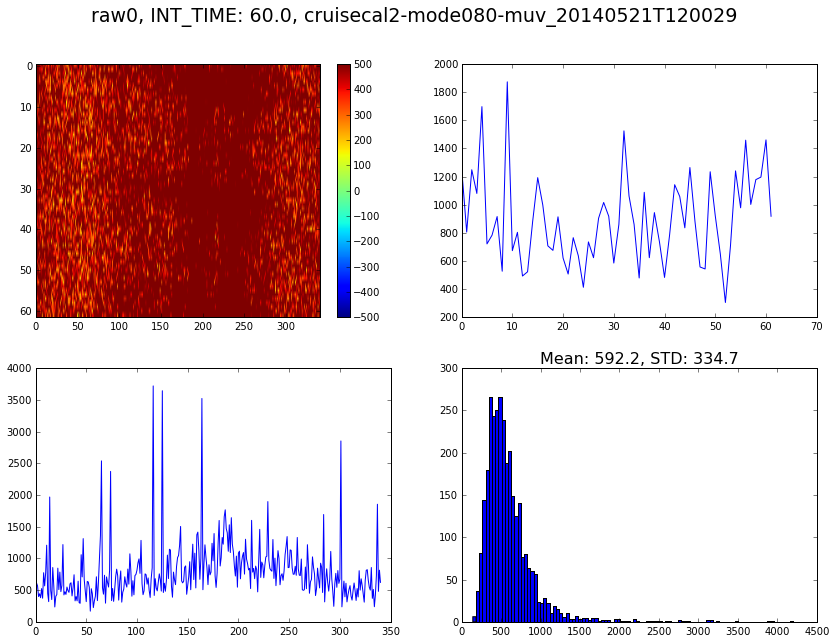

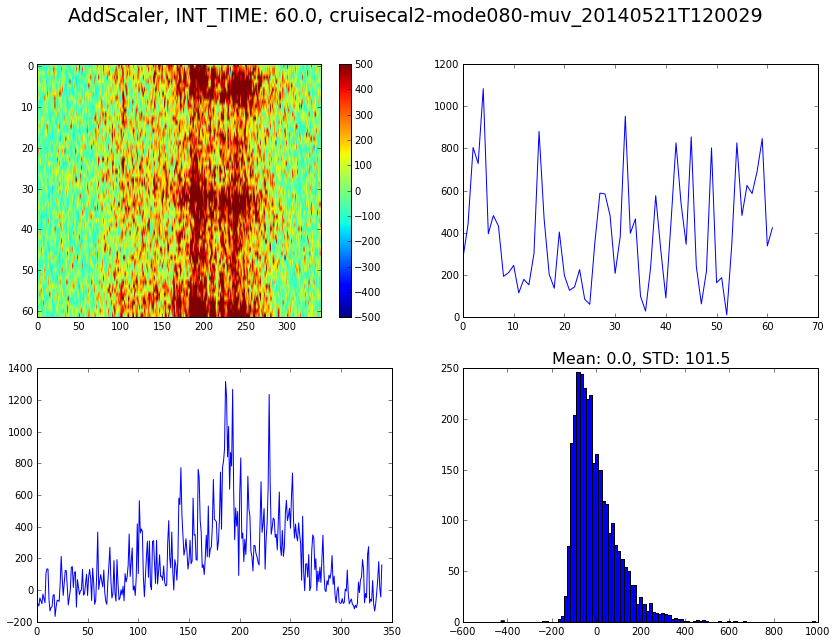

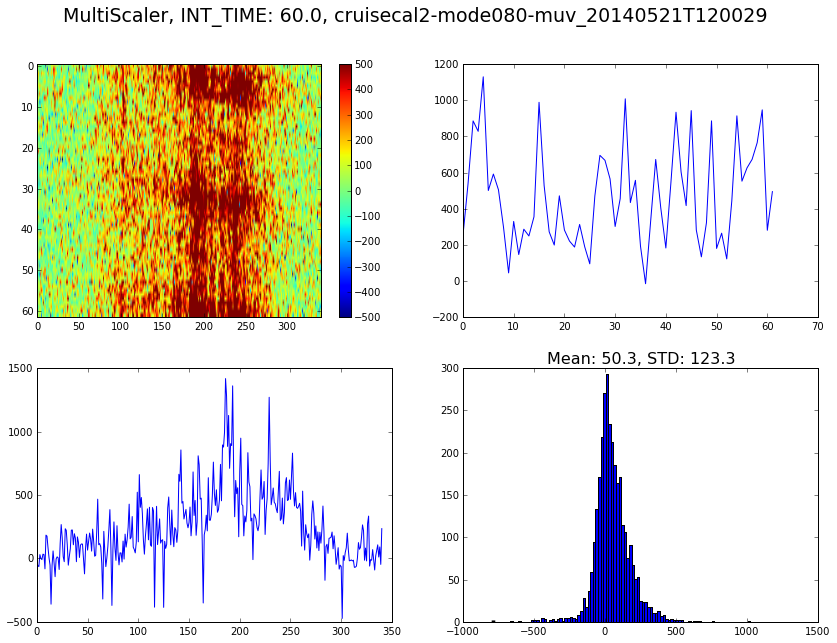

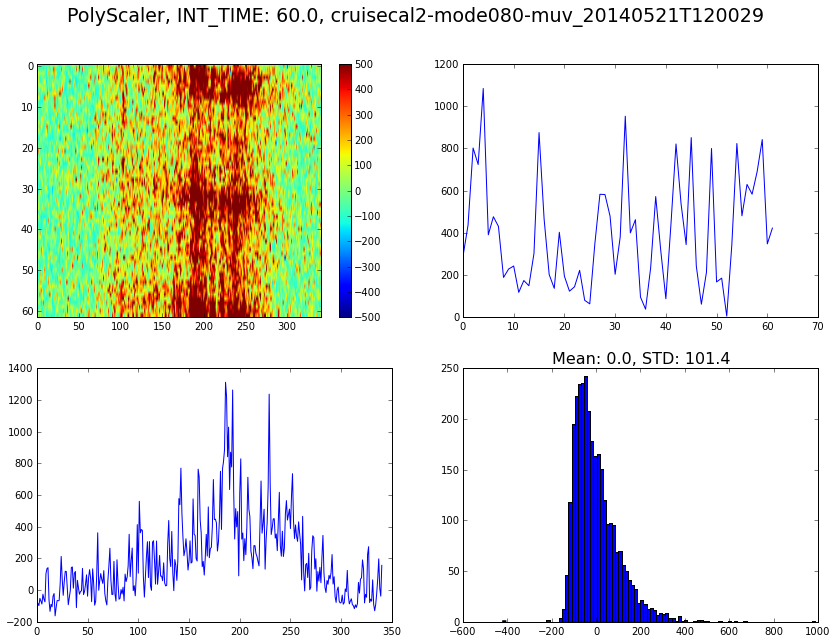

In [32]:
for title, img in zip(['raw0', 'AddScaler','MultiScaler','PolyScaler'],
                      [raw0]+scaled):
    fig, axes = subplots(2,2, figsize=(14,10))
    axes = axes.flatten()
    p2, p98 = np.percentile(img, (2, 98))
    im = axes[0].imshow(img, vmin=-500, vmax=500, aspect='auto')
    colorbar(im, ax=axes[0])
    axes[1].plot(img[:, 170])
    axes[2].plot(img[30])
    tohist = img[:, :50]
    axes[3].hist(tohist.ravel(), bins=100)
    axes[3].set_title("Mean: {:.1f}, STD: {:.1f}".format(tohist.mean(), tohist.std()), fontsize=16)
    fig.suptitle("{title}, INT_TIME: {itime}, {fname}".format(title=title, 
                                                              itime=l1b.img_header['INT_TIME'],
                                                              fname=dataid),
                 fontsize=19)
    fig.savefig(title+'.png', dpi=150)

In [17]:
pwd

'/Users/klay6683/Dropbox/src/iuvs/notebooks'

In [18]:
!open .